<a href="https://colab.research.google.com/github/colinchu1/CAP4630/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTS



In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.model_selection import train_test_split

#Problem 1 
Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = [[] for j in range(m)] 
  labels = []
  for x in range (0,m):
    c = random.randint(0,1)
    x_1 = np.random.uniform()
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n
    data[x].append(x_1)
    data[x].append(x_2)
    labels.append(c)
  return data, labels

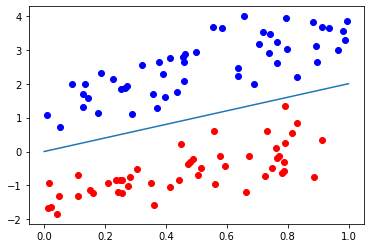

In [0]:
mu , sigma = 1.5,0.5
m = 100
w = 2
b = 0
data, labels = get_random_data(w,b,mu,sigma,m)
data = np.array(data)
labels = np.array(labels)
cdict = {1: 'red', 2: 'blue'}
def display_random_data(labels, data):
  plt.figure()
  #plt.scatter(data[:,0], data[:,1])
  for x in range(0,m):
    #if label is 0 be blue if 1 be red
    if labels[x] == 0:
      c = 2
    else:
      c = 1
    plt.scatter(data[x][0], data[x][1], color = cdict[c])
  x = np.linspace(0,1,100)
  y = w * x + b
  #plot the true line
  plt.plot(x,y)
  plt.show()
#display the data
display_random_data(labels,data)

In [0]:
# split the data
X_train, X_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)
#sanity check
print (X_train.shape, labels_train.shape)
print (X_test.shape, labels_test.shape)

(80, 2) (80,)
(20, 2) (20,)


#Problem 2
Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

import keras dense layer. sequential model

In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import initializers
model = Sequential() 
model.add(Dense(1, input_shape= (2,), activation='sigmoid' ,bias_initializer=initializers.Constant(1),)) 
#sanity check on weights and bias
weight0=model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(weight0)
print(bias)

[[-1.0318995]
 [ 1.216148 ]]
[1.]


Training the model and track validation loss and accruacy

In [0]:
from tensorflow.python.keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = 'SGD',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, labels_train,batch_size=1,epochs=10, validation_data=(X_test, labels_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
80/80 [==============================] - 0s 3ms/step - loss: 1.4698 - accuracy: 0.2875 - val_loss: 1.0688 - val_accuracy: 0.3000
Epoch 2/10
80/80 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.6000 - val_loss: 0.4634 - val_accuracy: 0.8500
Epoch 3/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8375 - val_loss: 0.2991 - val_accuracy: 0.9500
Epoch 4/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 0.9000 - val_loss: 0.2321 - val_accuracy: 0.9500
Epoch 5/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.900

In [0]:
#sanity check
test_loss, test_acc = model.evaluate(X_test,  labels_test, verbose=2)
print(test_loss)
print(test_acc)


1/1 - 0s - loss: 0.1184 - accuracy: 0.9500
0.11836525052785873
0.949999988079071


In [0]:
#sanity check
from keras.layers import Softmax
probability_model = Sequential([model])
predictions = probability_model.predict(X_test)
print(X_test)
print(labels_test)
print(predictions)
def red_or_blue(n):
  return round(n[0])
result = map(red_or_blue,predictions)
result2 = list(result)
print(result2)

Using TensorFlow backend.


[[ 0.48057434 -0.31667015]
 [ 0.46083995  2.63684389]
 [ 0.88475839  3.80670484]
 [ 0.18555246  2.3154258 ]
 [ 0.74799542 -0.47550711]
 [ 0.65627784  3.98982184]
 [ 0.43596276  1.76363329]
 [ 0.45734457  2.79481315]
 [ 0.27149939  1.91807639]
 [ 0.79431225  3.93255417]
 [ 0.98163857  3.54652065]
 [ 0.04369301 -1.84075555]
 [ 0.73202353  0.60150753]
 [ 0.28140147 -0.7393124 ]
 [ 0.46087147  2.09206342]
 [ 0.14995753 -1.12967429]
 [ 0.76558611  3.23810135]
 [ 0.25719096 -1.21501339]
 [ 0.79720962  3.02311971]
 [ 0.26442584  1.86770367]]
[1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0]
[[0.79095924]
 [0.04882678]
 [0.00680044]
 [0.09100544]
 [0.7973683 ]
 [0.00614047]
 [0.15763476]
 [0.03925422]
 [0.14393836]
 [0.00604433]
 [0.009251  ]
 [0.9796084 ]
 [0.45219314]
 [0.8900938 ]
 [0.10214192]
 [0.94029033]
 [0.0168331 ]
 [0.9428936 ]
 [0.02239656]
 [0.15390775]]
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]


In [0]:
#sanity check
correct = 0
for x in range(len(labels_test)):
  if int(labels_test[x]) == int(result2[x]):
    correct += 1
  
  print("{} - {}".format(labels_test[x], int(result2[x])))
print(correct) 

1 - 1
0 - 0
0 - 0
0 - 0
1 - 1
0 - 0
0 - 0
0 - 0
0 - 0
0 - 0
0 - 0
1 - 1
1 - 0
1 - 1
0 - 0
1 - 1
0 - 0
1 - 1
0 - 0
0 - 0
19


### ${y= w_1x_1 + w_2x_2 + b}$ 
### ${0= w_1x_1 + w_2x_2 + b}$ 
solve for ${x_2}$

${x_2}$= -${(w_1/w_2)x_1 - (b/w_2)}$

y = wx + b

${w = -(w_1/w_2)}$

${b = - (b/w_2)}$

In [0]:
#calculating the slope and y intercept
x_intercept = -(bias[0]/weight0[0])
y_intercept = -bias[0]/weight0[1]
slope = y_intercept/x
print(slope)
print(y_intercept)

[-0.04327728]
[-0.8222683]


##Display the data with separating line by the model prediction and true line

[array([[-0.7210085],
       [-1.460756 ]], dtype=float32), array([1.2146376], dtype=float32)]
[-0.7210085]
0


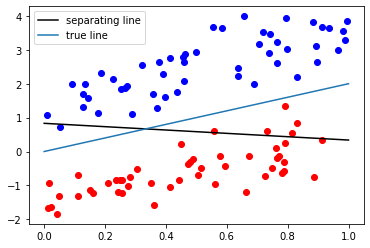

In [0]:
#plt.scatter(data[:,0], data[:,1])
for x in range(0,m):
  #if label is 0 be blue,  else red
  if labels[x] == 0:
    c = 2
  else:
    c = 1
  #plot the data
  plt.scatter(data[x][0], data[x][1], color = cdict[c])
x = np.linspace(0,1,100)
#get weight from model
weights = model.get_weights()
#sanity check
print(weights)
w1 = weights[0][0]
#sanity check
print(w1)
#find slope and y-intercept
w2 = weights[0][1]
bias = weights[1][0]
pre_b = -bias/w2
pre_w = -w1/w2
pre_y = pre_w*x+pre_b
y = w*x+b
#sanity check
print(b)
plt.plot(x, pre_y ,'k-',label = 'separating line')
plt.plot(x,y ,label = 'true line')
plt.legend()
plt.show()

##Display the head map made with the prediction from the model

In [0]:
def heatmap(data):
  # Creates X, Y plane
  xx = np.linspace(0, 1, 100)
  y_min = min(data[:,1])
  y_max = max(data[:,1])
  yy = np.linspace(y_min, y_max, 100)
  X1, Y1 = np.meshgrid(xx, yy)
  # Creates Z values based on x, y grid
  X_flat = X1.flatten()
  Y_flat = Y1.flatten()
  Z = np.column_stack((X_flat, Y_flat))
  #sanity check
  print(Z.shape)
  Z = model.predict(Z)
  #sanity check
  print(Z.shape)
  Z = Z.reshape((100,100))

  # Configures the plot
  fig = plt.figure()
  ax = plt.axes()

  # Draws the heatmap
  contours = ax.contourf(X1, Y1, Z, 100, cmap='RdBu_r')
  im = ax.imshow(Z, extent=[0, 1, y_min, y_max], cmap='RdBu_r', alpha=0.5, aspect='auto')
    
  # Gives a colorbar (should be in range [0,1])
  plt.colorbar(im, ax=ax)

(10000, 2)
(10000, 1)


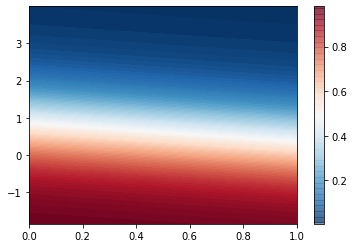

In [0]:
heatmap(data)

#Problem 3 
Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

In [0]:
def loss_gradient(a, label, X_b):
    return (a - label) * X_b
def predict(a):
    return 0 if a < 0.5 else 1
def test_model(test_data, test_labels, W_b):
    correct_predictions = 0
    total_loss = 0
    testd = np.column_stack((test_data, np.ones(shape=(test_data.shape[0], 1))))
    for i_data in range(len(test_data)):
        # Process the input
        z = np.dot(testd[i_data], W_b)
        a = sigmoid(z)

        # Make a prediction
        p = predict(a)
        if p == test_labels[i_data]:
            correct_predictions += 1
        
        # Determine loss
        total_loss += binary_crossentropy(a, test_labels[i_data])
    # Return a summary
    print(total_loss)
    return (total_loss / len(test_data), correct_predictions / len(test_data))
def sigmoid (z):
    return 1 / (1 + np.exp(-z))
def binary_crossentropy(a, label):
    return -label*np.log(a) - (1 - label)*np.log(1 - a)
def logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learing_rate):
    # Randomize the initial weights
    W_b = np.random.random_sample((3, ))
    trd = np.column_stack((X_train, np.ones(shape=(X_train.shape[0], 1))))
    for epoch in range(epochs):
        # Only perform stochastic gradient descent
        for i_data in range(len(train_data)):
            # Process the input
            z = np.dot(trd[i_data], W_b)
            a = sigmoid(z)

            # Determine the gradient of the loss
            Lg_b = (a- train_labels[i_data])* trd[i_data]

            # Apply the gradient to the weights
            W_b -= Lg_b * learning_rate
        
        # Analyze the loss and accuracy for each epoch
        loss, accuracy = test_model(test_data, test_labels, W_b)
        print(f'Epoch {epoch+1}/{epochs} - val_loss: {loss} - val_accuracy: {accuracy}')
    
    # Return the trained weights
    return W_b

Doing logistic regression

In [0]:
epochs = 10
learning_rate = 0.01

W_b = logistic_regression(X_train, labels_train, X_test, labels_test, epochs, learning_rate)

10.74936820606641
Epoch 1/10 - val_loss: 0.5374684103033205 - val_accuracy: 0.75
5.700031811842113
Epoch 2/10 - val_loss: 0.2850015905921056 - val_accuracy: 1.0
4.094932174216998
Epoch 3/10 - val_loss: 0.2047466087108499 - val_accuracy: 1.0
3.3243461587791114
Epoch 4/10 - val_loss: 0.16621730793895556 - val_accuracy: 1.0
2.8627930693697214
Epoch 5/10 - val_loss: 0.14313965346848606 - val_accuracy: 1.0
2.5488122276781713
Epoch 6/10 - val_loss: 0.12744061138390855 - val_accuracy: 1.0
2.317401821124031
Epoch 7/10 - val_loss: 0.11587009105620154 - val_accuracy: 1.0
2.137389009990865
Epoch 8/10 - val_loss: 0.10686945049954324 - val_accuracy: 1.0
1.9918911746848238
Epoch 9/10 - val_loss: 0.0995945587342412 - val_accuracy: 1.0
1.870912251651367
Epoch 10/10 - val_loss: 0.09354561258256835 - val_accuracy: 1.0


[ 0.44411962 -1.5929194   0.87085075]
-1.5929194020780673


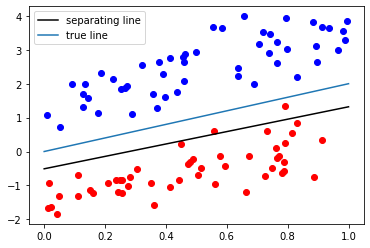

In [0]:
#same code from the displaying data from above expcept using 
for x in range(0,m):
  if labels[x] == 0:
    c = 2
  else:
    c = 1
  plt.scatter(data[x][0],data[x][1], color = cdict[c])
#set up x value 
x = np.linspace(0,1,100)
#sanity check
print(W_b)
w1 = W_b[1]
#sanity check
print(w1)
w2 = W_b[2]
bias = W_b[0]
pre_b = -bias/w2
pre_w = -w1/w2
pre_y = pre_w*x+pre_b
y = w*x+b
plt.plot(x, pre_y ,'k-',label = 'separating line')
plt.plot(x,y ,label = 'true line')
plt.legend()
plt.show()

In [0]:
def prediction(data):
  #sanity check
  print(data.shape)
  #add bias to the data
  np_data = np.column_stack((data, np.ones(shape=(data.shape[0], 1))))
  z = np.dot(np_data,W_b)
  return sigmoid(z)
def myheatmap(data):
  # Creates X, Y plane
  xx = np.linspace(0, 1, 100)
  y_min = min(data[:,1])
  y_max = max(data[:,1])
  yy = np.linspace(y_min, y_max, 100)
  X1, Y1 = np.meshgrid(xx, yy)
  # Creates Z values based on x, y grid
  X_flat = X1.flatten()
  Y_flat = Y1.flatten()
  Z = np.column_stack((X_flat, Y_flat))
  #sanity check
  print(Z.shape)
  Z = prediction(Z)
  Z = Z.reshape((100,100))

  # Configures the plot
  fig = plt.figure()
  ax = plt.axes()

  # Draws the heatmap
  contours = ax.contourf(X1, Y1, Z, 100, cmap='RdBu_r')
  im = ax.imshow(Z, extent=[0, 1, y_min, y_max], cmap='RdBu_r', alpha=0.5, aspect='auto')
    
  # Gives a colorbar (should be in range [0,1])
  plt.colorbar(im, ax=ax)

(10000, 2)
(10000, 2)


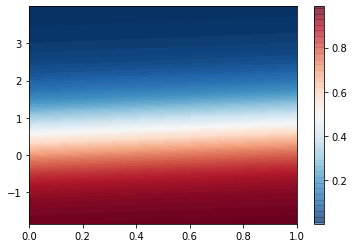

In [0]:
#display heatmap
myheatmap(data)